In [36]:
import numpy as np
from MCMC import callikelihood,MCMC
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [40]:
def forwardmap(v):
    # define a simple forward map for test.
    # in reality v is the vector of inputs (In this version, it has three dimensional : [s,x,y])
    # and output should be the distribution of slip
    # The forward map should be the FNO that gets v as input and spits out the slip distribution
    return v
u=np.array([0]) # This should be the observed slip distribution
sigma=3 # standard deviation of noise in forwardmap
propvar=1e-1 # proposed variance for random walk
v0=np.array([-10]) # inital point for MCMC (for our case it is a three dimensional vector)
N=100000        # number of MCMC steps
burnin=1000     # Remove first burnin samples

In [41]:
samples=MCMC(v0,N,u,propvar,sigma,callikelihood,forwardmap)

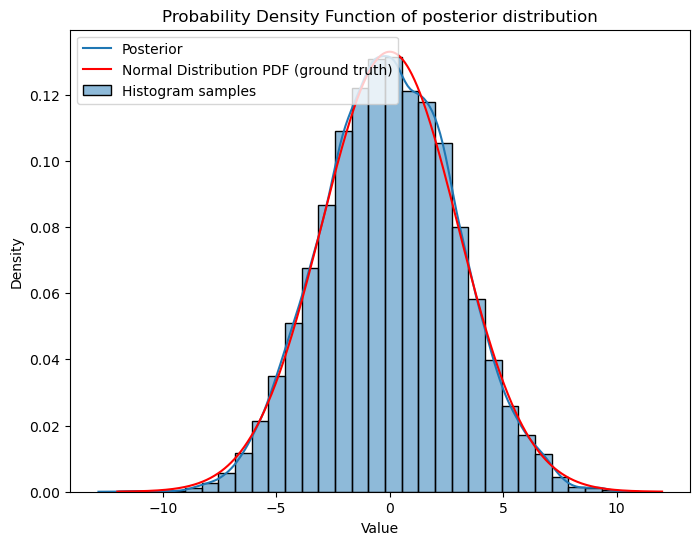

In [42]:
plt.figure(figsize=(8, 6))

# Histogram with density=True to normalize to form a PDF
sns.histplot(samples[burnin:], kde=False, bins=30, color='skyblue', stat='density')

# Kernel Density Estimation (KDE)
sns.kdeplot(samples[burnin:], color='red')
# To check, lets, plot the pdf of a normal distribution 
mu = 0  # mean (we adjusted in the observvation for the posteriror to have mean zero)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf_values = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_values, color='red')
plt.title(r'Probability Density Function of posterior distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(['Posterior','Normal Distribution PDF (ground truth)','Histogram samples'], loc='upper left')